# Métodos de Monte Carlo

Juan Sosa PhD

Email jcsosam@unal.edu.co

GitHub https://github.com/jstats1702

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as st
from matplotlib import pyplot as plt
%matplotlib inline

## 1 Modelo general

Si Su estado de información acerca de las secuencia de observaciones $y_1,\ldots,y_n$ es intercambiable, entonces el modelamiento $y_1,\ldots,y_n$ admite representación jerárquica de la forma:
\begin{align*}
	y_i\mid\theta,\sigma^2 &\stackrel{\text{iid}}{\sim} \textsf{N}(\theta,\sigma^2)\\
	(\theta,\sigma^2) &\sim p(\theta,\sigma^2) 
\end{align*}

El modelo tiene $k=2$ parámetros desconocidos, a saber, la **media** $\theta$ (parámetro de localización) y la **varianza** $\sigma^2$ (cuadrado del parámetro de escala). Por lo tanto, $\boldsymbol{\theta}=(\theta,\sigma^2)$.


## 2 Estadístico suficiente

Si $y_i\mid\theta,\sigma^2\stackrel{\text{iid}}{\sim} \textsf{N}(\theta,\sigma^2)$, con $i=1,\ldots,n$, entonces la **distribución muestral conjunta** de las observaciones es:
$$
p\left(\boldsymbol{y} \mid \theta, \sigma^{2}\right)=\prod_{i=1}^n \left(2 \pi \sigma^{2}\right)^{-1 / 2} \exp{ \left\{-\frac{1}{2} \left(\frac{y_{i}-\theta}{\sigma}\right)^{2}\right\} } = \left(2 \pi \sigma^{2}\right)^{-n / 2} \exp { \left\{-\frac{1}{2} \sum_{i=1}^{n}\left(\frac{y_{i}-\theta}{\sigma}\right)^{2}\right\} }\,,
$$
donde $\boldsymbol{y}=(y_1,\ldots,y_n)$.

Note que el **núcleo** de esta distribución se puede escribir como:
$$
\sum_{i=1}^n\left(\frac{y_{i}-\theta}{\sigma}\right)^{2}=\frac{1}{\sigma^{2}} \sum_{i=1}^{n} y_{i}^{2}-2 \frac{\theta}{\sigma^{2}} \sum_{i=1}^{n} y_{i}+n \frac{\theta^{2}}{\sigma^{2}}\,,
$$
lo cual sugiere que
$$
\left(\sum_{i=1}^{n} y_{i}, \sum_{i=1}^{n} y_{i}^{2}\right)
$$
es un **estadístico suficiente** para $(\theta,\sigma^2)$. 

La media muestral y la varianza muestral $(\bar{y},s^2)$,
$$
\bar{y} = \frac{1}{n}\sum_{i=1}^n y_i\qquad\text{y}\qquad s^2 =\frac{1}{n-1}\left(\sum_{i=1}^n y_i^2 - n\bar{y}^2\right)
$$ 
también constituye un **estadístico suficiente** para $(\theta,\sigma^2)$, dado que
$$
\sum_{i=1}^n(y_i - \theta)^2 = (n-1)s^2 + n(\bar{y} - \theta)^2\,.
$$


## 3 Modelo  Gamma Inversa-Normal-Normal

La verosimilitud está dada por:
$$
y_i\mid\theta,\sigma^2 \stackrel{\text{iid}}{\sim} \textsf{N}(\theta,\sigma^2),\qquad i=1,\ldots,n\,.
$$
Observe que $p(\theta,\sigma^2) = p(\theta\mid\sigma^2)\,p(\sigma^2)$. Así, la previa conjugada se puede escribir como:
$$
\begin{aligned}
	\theta \mid \sigma^{2} & \sim \textsf{N}\left(\mu_{0}, \frac{\sigma^{2}}{\kappa_{0}}\right) \\
	\sigma^{2} & \sim \textsf{GI}\left(\frac{\nu_{0}}{2}, \frac{\nu_{0}\,\sigma_{0}^{2}}{2}\right)
\end{aligned}
$$
donde $\mu_0,\kappa_0,\nu_0,\sigma^2_0$ son los **hiperparámetros** del modelo. Esta parametrización de la previa es muy conveniente para otorgar una **interpretación práctica** a los hiperparámetros.

La variable aleatoria $X$ tiene distribución Gamma-Inversa con parámetros $\alpha,\beta > 0$, i.e., $X\mid\alpha,\beta\sim\textsf{GI}(\alpha,\beta)$, si su función de densidad de probabilidad es
$$
p(x\mid\alpha,\beta) = \frac{\beta^\alpha}{\Gamma(\alpha)}\,x^{-(\alpha+1)}\,e^{-\beta/x}\,,\quad x>0\,.
$$
Esta distribución se puede obtener a partir de la distribución Gamma: Si $X\sim\textsf{Gamma}(\alpha,\beta)$, entonces $\tfrac{1}{X}\sim\textsf{GI}(\alpha,\beta)$.

Bajo el modelo Gamma Inversa-Normal-Normal se tiene que la **distribución posterior** de $\boldsymbol{\theta}$ es
$$
p(\theta,\sigma^2\mid \boldsymbol{y}) = p(\theta\mid \sigma^2, \boldsymbol{y})\,p(\sigma^2\mid \boldsymbol{y})
$$
donde:

- $p(\theta\mid \sigma^2, \boldsymbol{y}) = \textsf{N}\left(\theta\mid\mu_{n}, \frac{\sigma^{2}}{\kappa_{n}}\right)$, con
	$$
	\kappa_n = \kappa_0+n \qquad\text{y}\qquad \mu_n = \frac{\kappa_0}{\kappa_n}\mu_0 + \frac{n}{\kappa_n}\bar{y}\,,
	$$
	dado que $p(\theta\mid\sigma^2,\boldsymbol{y})\propto p(\boldsymbol{y}\mid\theta,\sigma^2)\,p(\theta\mid\sigma^2)$.
	Esta distribución se denomina **distribución condicional completa** de $\theta$.
- $p(\sigma^2\mid \boldsymbol{y}) =  \textsf{GI}\left(\sigma^2\mid\frac{\nu_n}{2},\frac{\nu_n\,\sigma^2_n}{2}\right)$, con
	$$
	\nu_n = \nu_0+n\qquad\text{y}\qquad \sigma_{n}^{2}=\frac{1}{\nu_{n}}\left[\nu_{0} \sigma_{0}^{2}+(n-1) s^{2}+n \frac{\kappa_{0}}{\kappa_{n}}\left(\bar{y}-\mu_{0}\right)^2\right]\,,
	$$
	dado que 
	$$
	p(\sigma^2\mid\boldsymbol{y}) \propto p(\sigma^2)\,p(\boldsymbol{y}\mid \sigma^2) = p(\sigma^2)\int_{-\infty}^\infty p(\boldsymbol{y}\mid\theta,\sigma^2)\,p(\theta\mid\sigma^2)\,\text{d}\theta\,.
	$$

Bajo esta parametrización de la distribución previa, se puede interpretar que:

- $\mu_0$ corresponde a la media previa de $\kappa_0$ observaciones previas.
- $\sigma^2_0$ corresponde a la varianza previa de $\nu_0$ observaciones previas.
- $(n-1) s^{2}$, $\nu_{0} \sigma_{0}^{2}$ y $\nu_{n} \sigma_{n}^{2}$ son las sumas de cuadrados muestral, previa, y posterior, respectivamente.


## 4 Distribuciones marginales

Bajo el modelo Gamma Inversa-Normal-Normal se tiene que las distribuciones posteriores marginales para $\sigma^2$, $\theta$, y $y^*$ son respectivamente:
\begin{align*}
\sigma^2\mid \boldsymbol{y} &\sim  \textsf{GI}\left(\frac{\nu_n}{2},\frac{\nu_n\,\sigma^2_n}{2}\right) \\
\theta\mid \boldsymbol{y}      &\sim  \textsf{t}_{\nu_n}\left( \mu_n,\frac{\sigma^2_n}{\kappa_n} \right) \\
y^*\mid\boldsymbol{y}       &\sim  \textsf{t}_{\nu_n}\left( \mu_n,\frac{\kappa_n+1}{\kappa_n}\,\sigma^2_n \right)\,.
\end{align*}	


## 5 Simulación de muestras de la distribución posterior

Para $b=1,\ldots,B$: 

- Simular $(\sigma^2)^{(b)}\sim \textsf{GI}\left(\frac{\nu_n}{2},\frac{\nu_n\,\sigma^2_n}{2}\right)$.
- Simular $\theta^{(b)} \sim \textsf{N} \left(\mu_{n}, \frac{(\sigma^{2})^{(b)}}{\kappa_{n}}\right)$.

Este procedimiento genera un conjunto de **muestras independientes de la distribución posterior** $p(\theta,\sigma^2\mid \boldsymbol{y})$ de la forma:
$$
\left(\theta^{(1)},(\sigma^2)^{(1)}\right),\ldots,\left(\theta^{(B)},(\sigma^2)^{(B)}\right)\,,
$$
que se pueden utilizar para caracterizar cualquier aspecto de la distribución conjunta, como de las distribuciones posteriores marginales $p(\theta\mid \boldsymbol{y})$ y $p(\sigma^2\mid \boldsymbol{y})$.


## 6 Ejemplo: Anatomia de mosquitos Af

En 1981, los biólogos W. L. Grogan y W. W. Wirth descubrieron en las selvas de 
Brasil dos nuevas variedades de un diminuto insecto picador llamado mosquito 
(*midge*). Llamaron a un tipo de mosquito Apf y al otro mosquito Af. 
Los biólogos descubrieron que el mosquito Apf es portador de una enfermedad 
debilitante que causa inflamación del cerebro cuando un humano está mordido 
por un mosquito infectado. Aunque la enfermedad rara vez es fatal, la 
discapacidad causada por la hinchazón puede ser permanente. La otra forma de 
mosquito, el Af, es bastante inofensiva y un valioso polinizador. 
En un esfuerzo por distinguir las dos variedades, los biólogos tomaron medidas 
en los mosquitos que capturaron. Este es un conjunto de datos valioso para 
probar métodos de clasificación.

***Grogan Jr, W. L., & Wirth, W. W. (1981). A new American genus of predaceous midges related to Palpomyia and Bezzia (Diptera: Ceratopogonidae). Un nuevo género Americano de purrujas depredadoras relacionadas con Palpomyia y Bezzia (Diptera: Ceratopogonidae). Proceedings of the Biological Society of Washington., 94(4), 1279-1305.***

![](modelo_normal_midge.png)

Considere los datos de la **longitud del ala en milímetros** ($y$) de $n=9$ miembros de 
la **especie Af de mosquitos**. A partir de estas nueve mediciones, se quiere 
hacer inferencia sobre la **media poblacional** $\theta$. 

Otros estudios sugieren que 
la longitud de las alas suele ser de alrededor de 1.9 mm. Claramente, se tiene 
que las longitudes deben ser positivas, lo que implica que $\theta > 0$.

Los datos de Grogan y Wirth se encuentran disponibles en la librería `Flury` de R, pero esta librería no se encuentra disponible para versiones reciente de R.


In [2]:
# datos y estadísticos suficientes
y = np.array([1.64, 1.70, 1.72, 1.74, 1.82, 1.82, 1.82, 1.90, 2.08])
n = len(y)
n

9

In [3]:
ybar = np.mean(y)
ybar

1.8044444444444447

In [4]:
s2 = np.var(y,ddof = 1)
s2

0.016877777777777787

### 6.1 Elicitación de los hiperparámetros

Se considera un modelo Normal conjugado para caracterizar la población de referencia relacionada con este conjunto de datos.

Los hiperparámetros se pueden interpretar como:

- $\mu_0$      : media a priori.
- $\kappa_0$   : no. de "observaciones previas" (cantidad de info) asociadas con $\mu_0$.
- $\sigma^2_0$ : varianza a priori.
- $\nu_0$      : no. de "observaciones previas" (cantidad de info) asociadas con $\sigma^2_0$.

Información previa:

- Otros estudios sugieren que la longitud promedio suele ser de 1.9 mm con una una desviación estándar de 0.1 mm.
- Se usa $\kappa_0 = \nu_0 = 1$ para que las previas sean no informativas dado que esta población en particular puede diferir notoriamente de aquellas estudiadas en otras investigaciones.


In [5]:
# hiperparametros
mu0 = 1.9  
k0  = 1
s20 = 0.1**2 
nu0 = 1

### 6.3 Distribución posterior

La distribución posterior de $(\theta,\sigma^2)$ es:
$$
p( \theta, \sigma^2 \mid \boldsymbol{y} ) = p( \theta \mid \sigma^2, \boldsymbol{y} ) \, p(\sigma^2 \mid \boldsymbol{y})
$$
donde
$$
p( \theta \mid \sigma^2, \boldsymbol{y} ) = \textsf{N}( \theta \mid 1.814, \sigma^2/10 )
\qquad\text{y}\qquad
p(\sigma^2 \mid \boldsymbol{y}) = \textsf{GI}( \sigma^2 \mid 10/2, 10*0.015324/2 )
$$

In [6]:
# distribucion posterior
kn = k0 + n
kn

10

In [7]:
nun = nu0 + n
nun

10

In [8]:
mun = (k0*mu0 + n*ybar)/kn
mun

1.814

In [9]:
s2n = (nu0*s20 + (n-1)*s2 + k0*n*(ybar - mu0)**2/kn)/nun
s2n

0.015324

In [10]:
# representación gráfica de la distribucion posterior de (theta, sigma^2)
# utilizaremos las funciones st.invgamma.pdf y st.invgamma.logpdf
gs = 250 # n. de puntos a evaluar en un rango de valores
theta = np.linspace(1.6, 2.0, num = gs) # theta          : media
is2   = np.linspace(15, 160, num = gs) # 1/sigma^2       : presición
s2g   = np.linspace(0.001, 0.045, num = gs) # sigma^2    : varianza
# evaluar y almacenar la distribución posterior conjunta (escala log) en el rango de valores
# log p( theta, sigma^2 | y ) = log p( theta | sigma^2, y ) + log p(sigma^2 | y)
ld_th_is2 = np.zeros((gs,gs)) # para (theta,1/sigma^2)
ld_th_s2  = np.zeros((gs,gs)) # para (theta, sigma^2)
for i in range(gs):
    for j in range(gs):
        ld_th_is2[i,j] = st.norm.logpdf(x = theta[i], loc = mun, scale = 1/np.sqrt(is2[j]*kn)) + st.gamma.logpdf(x = is2[j], a = nun/2, scale = 1/(nun*s2n/2))   
        ld_th_s2[i,j]  = st.norm.logpdf(x = theta[i], loc = mun, scale = np.sqrt(s2g[j]/kn)) + st.invgamma.logpdf(x = s2g[j], a = nun/2, scale = nun*s2n/2)  # contraintuitivamente en python la función de densidad de una v.a. gamma-inversa está parametrizada en términos de shape (argumento 'a') y rate (argumento 'scale')

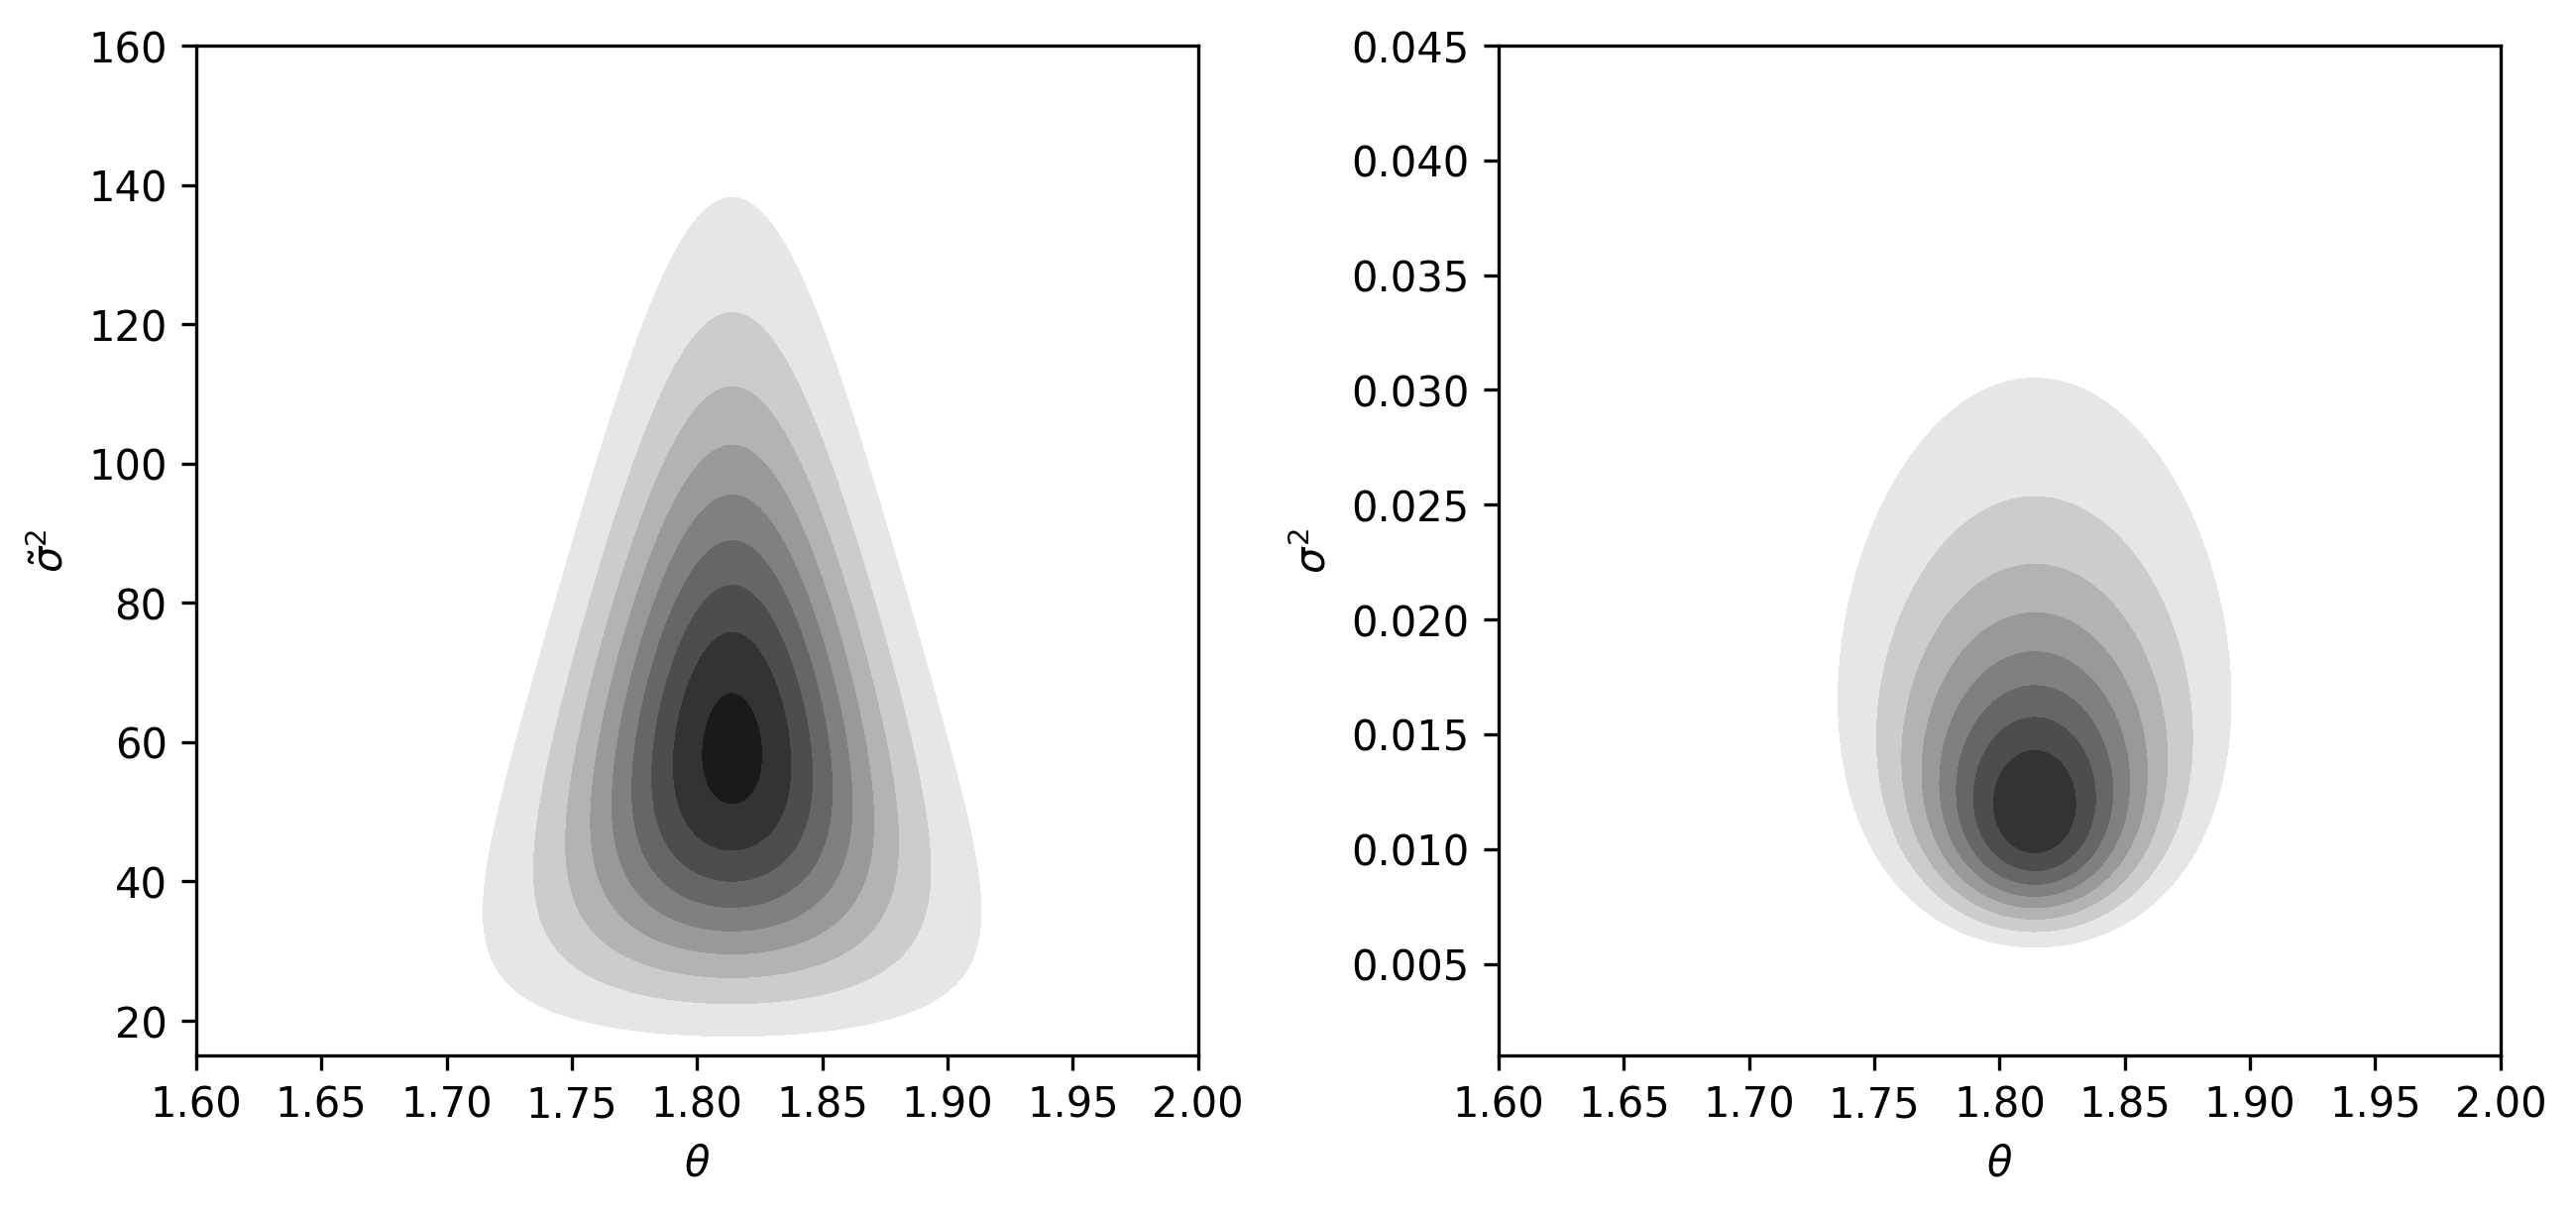

In [11]:
grays = [(g,g,g) for g in np.linspace(0, 1, num = 11)]
f, axes = plt.subplots(1, 2, figsize = (10, 4.5), dpi = 300)
plt.subplots_adjust(wspace = 0.3, hspace = 0.2)
axes[0].contourf(theta, is2, np.exp(ld_th_is2.T),colors = np.flip(grays),levels = 10)
axes[1].contourf(theta, s2g, np.exp(ld_th_s2.T),colors = np.flip(grays),levels = 10)
axes[0].set_xlabel(r'$\theta$')
axes[1].set_xlabel(r'$\theta$')
axes[0].set_ylabel(r'$\tilde\sigma^2$')
axes[1].set_ylabel(r'$\sigma^2$')
plt.show()

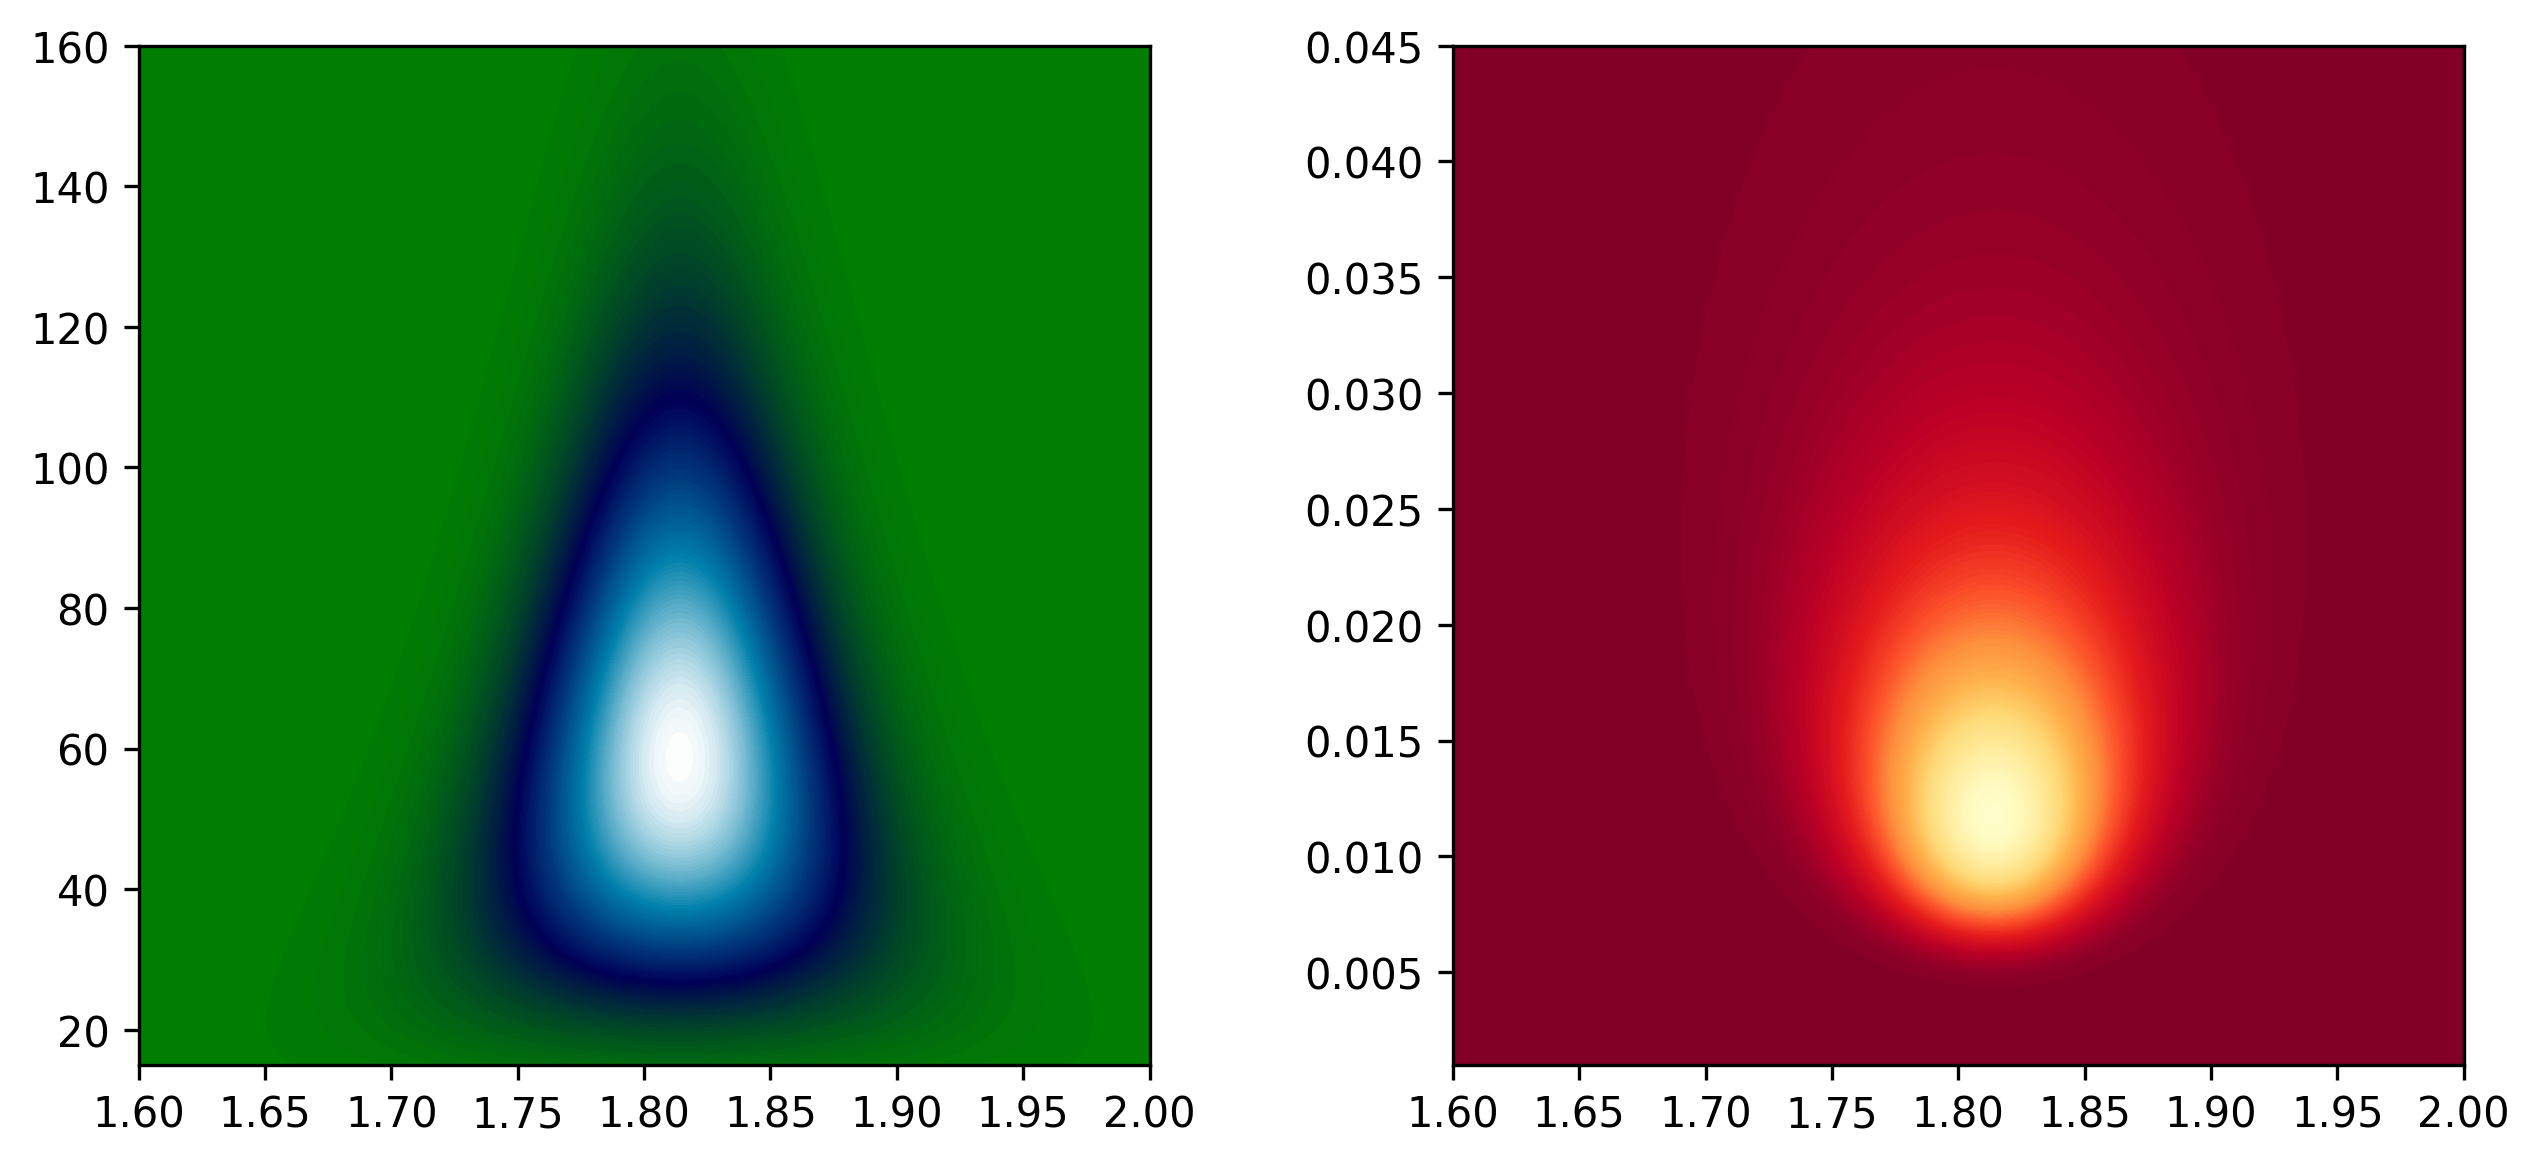

In [12]:
f, axes = plt.subplots(1, 2, figsize = (10, 4.5), dpi = 300)
plt.subplots_adjust(wspace = 0.3, hspace = 0.2)
# posterior (theta, 1/sigma^2)
axes[0].contourf(theta, is2, np.exp(ld_th_is2.T), cmap = 'ocean', levels = 100)
axes[1].contourf(theta, s2g, np.exp(ld_th_s2.T), cmap = 'YlOrRd_r', levels = 100)

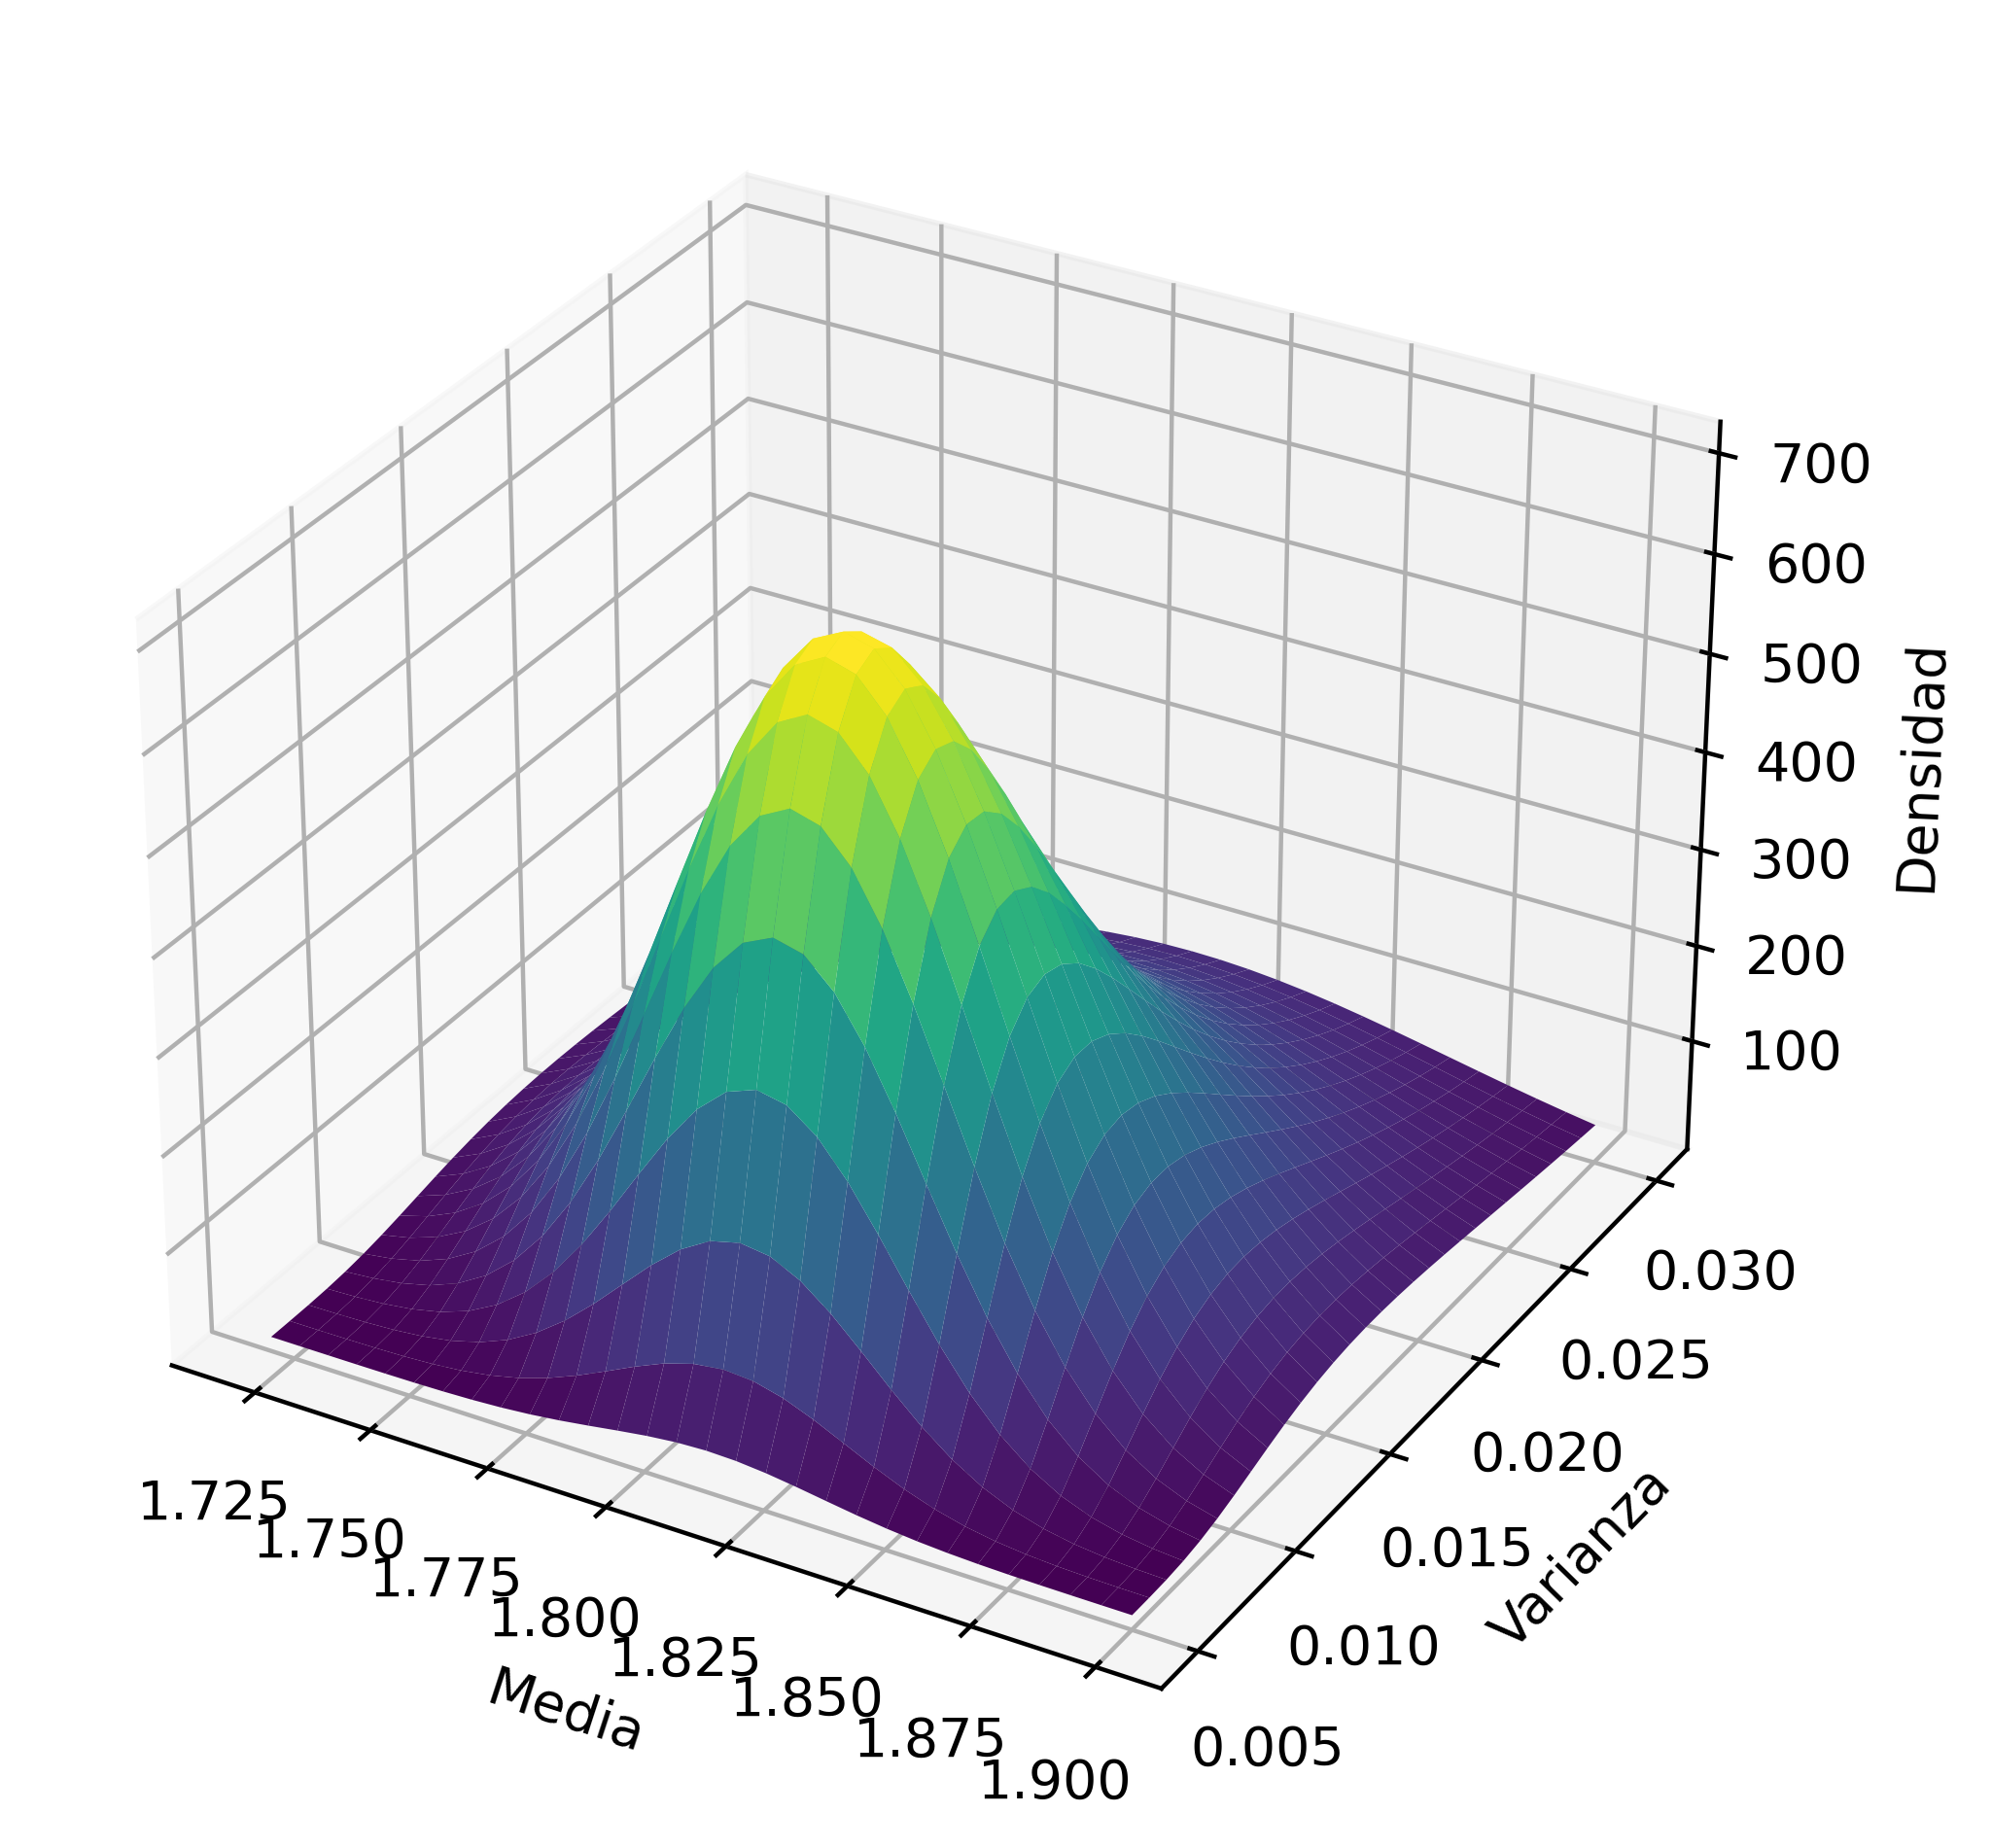

In [13]:
# GRAFICO 3-D
gs = 30 # n. de puntos a evaluar en un rango de valores
theta = np.linspace(1.72, 1.9, num = gs)       # theta    : media
s2g   = np.linspace(0.005,0.03, num = gs)      # sigma^2  : varianza
ld_th_s2 = np.zeros((gs,gs))                   # para (theta, sigma^2)
for i in range(gs):
    for j in range(gs):
        ld_th_s2[i,j] = st.norm.logpdf(x = theta[i], loc = mun, scale = np.sqrt(s2g[j]/kn)) + st.invgamma.logpdf(x = s2g[j], a = nun/2, scale = nun*s2n/2)
        
fig = plt.figure(figsize = (8,6), dpi = 400)
ax = fig.add_subplot(111, projection = '3d')
theta_gr = np.outer(theta, np.ones(30))
s2g_gr = np.outer(s2g, np.ones(30)).T
ax.plot_surface(theta_gr, s2g_gr, np.exp(ld_th_s2), shade = False, cmap = 'viridis')
ax.set_xlabel("Media")
ax.set_ylabel("Varianza")
ax.set_zlabel("Densidad")
plt.show()

### 6.3 Generación de muestras de la distribución posterior

- Simulación de Monte Carlo.
- Calcular cualquier cantidad posterior de interés: tendencia, variabilidad, probabilidades, gráficos, etc.


In [14]:
S = 50000 # n. de simulaciones
np.random.seed(1)
s2_postsample    = st.invgamma.rvs(a = nun/2, scale = nun*s2n/2, size = S)
theta_postsample = st.norm.rvs(loc = mun, scale = np.sqrt(s2_postsample/kn))

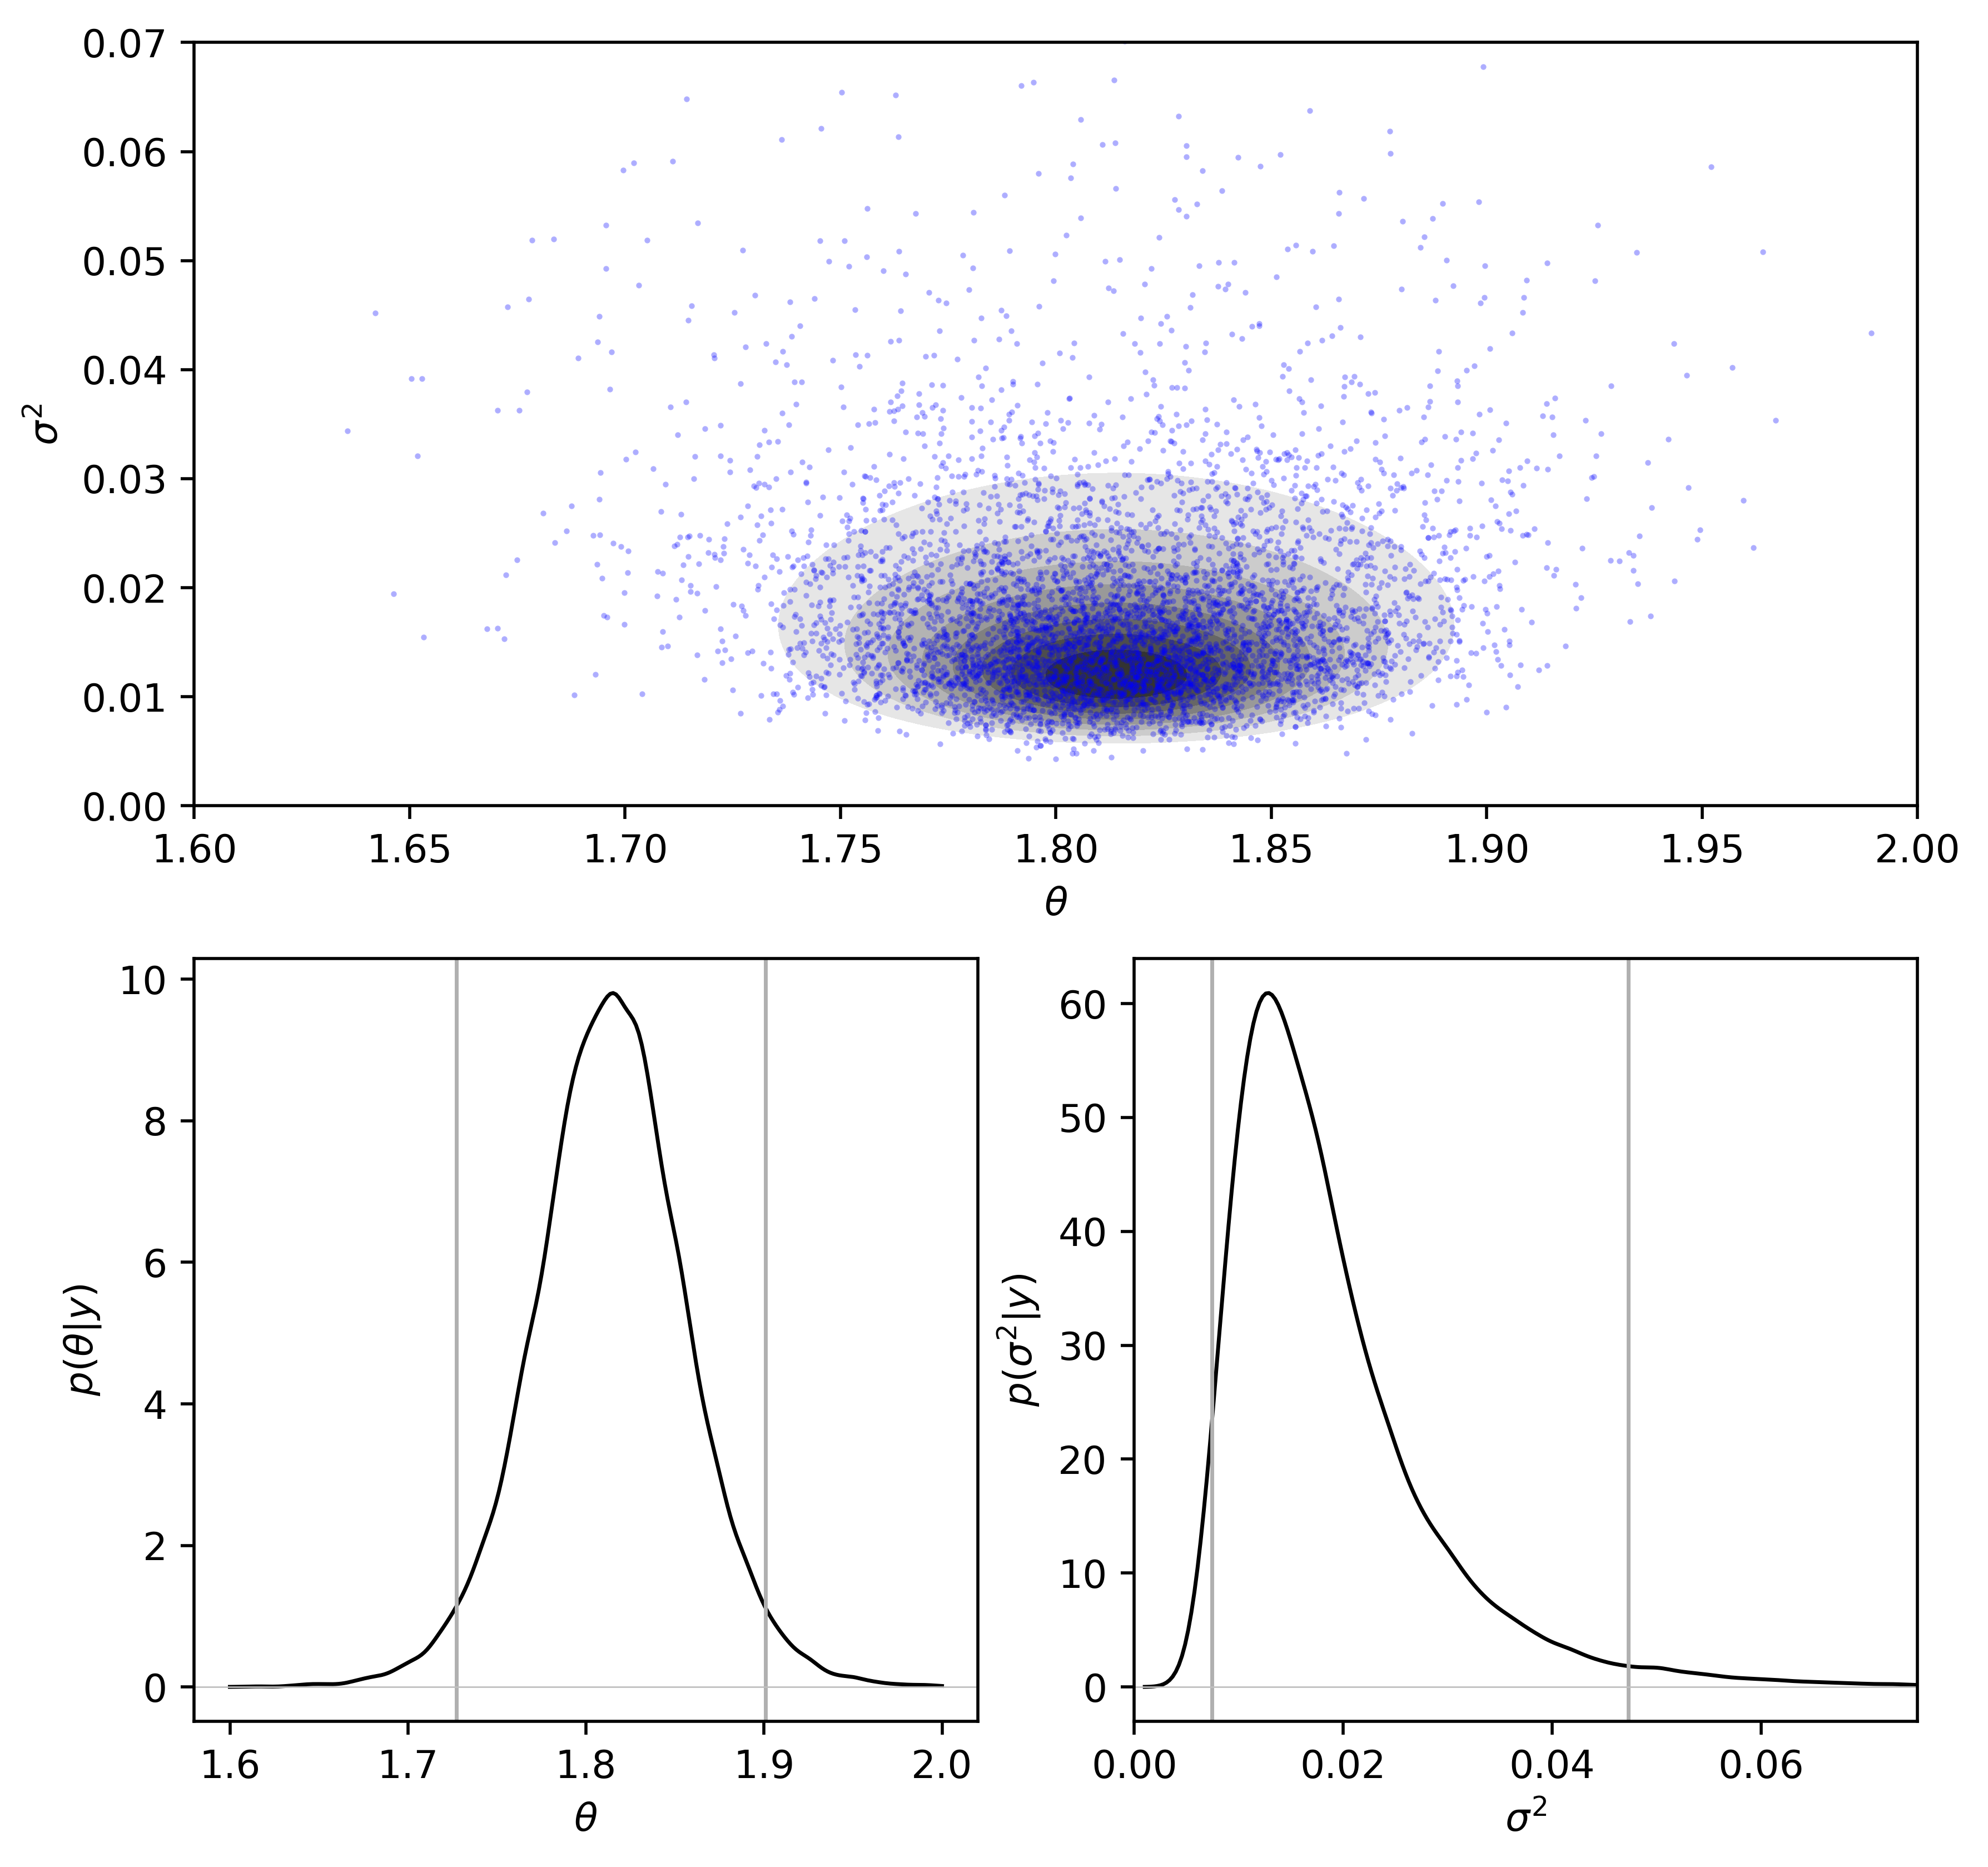

In [15]:
# evaluacion
gs = 250
theta = np.linspace(1.6,2.0, num = gs)     # theta    : media
s2g   = np.linspace(0.001,0.045, num = gs) # sigma^2  : varianza
ld_th_s2 = np.zeros((gs,gs))               # para (theta, sigma^2)
for i in range(gs):
    for j in range(gs):
        ld_th_s2[i,j] = st.norm.logpdf(x = theta[i], loc = mun, scale = np.sqrt(s2g[j]/kn)) + st.invgamma.logpdf(x = s2g[j], a = nun/2, scale = nun*s2n/2)   

# grafico
fig = plt.figure(figsize = (8,8), dpi = 500)
### Distribución posterior conjunta
ax = fig.add_subplot(2, 2, (1,2))
ax.contourf(theta, s2g, np.exp(ld_th_s2.T), colors = np.flip(grays), levels = 10)
ax.scatter(theta_postsample[:5000], s2_postsample[:5000], color = '#0000ff50', marker = '.', s = 1)
ax.set_ylim((0, 0.07))
ax.set_xlabel(r'$\theta$')
ax.set_ylabel(r'$\sigma^2$')
### distribución posterior marginal theta
ax = fig.add_subplot(2, 2, 3)
ax.plot(theta, st.gaussian_kde(theta_postsample)(theta), color = 'black', linewidth = 1)
ax.axvline(x = np.quantile(theta_postsample, q = [0.025]), color = '#b0b0b0', linewidth = 1)
ax.axvline(x = np.quantile(theta_postsample, q = [0.975]), color = '#b0b0b0', linewidth = 1)
ax.axhline(y = 0, color = '#c0c0c0', linewidth = 0.4)
ax.set_xlabel(r'$\theta$')
ax.set_ylabel(r'$p(\theta|y)$')
### distribución posterior marginal sigma^2
ax = fig.add_subplot(2, 2, 4)
s2g = np.linspace(0.001, 0.075, num = gs)
ax.plot(s2g,st.gaussian_kde(s2_postsample)(s2g),color = 'black',linewidth = 1)
ax.axvline(x = np.quantile(s2_postsample, q = [0.025]), color = '#b0b0b0', linewidth = 1)
ax.axvline(x = np.quantile(s2_postsample, q = [0.975]), color = '#b0b0b0', linewidth = 1)
ax.axhline(y = 0, color = '#c0c0c0', linewidth = 0.4)
ax.set_xlabel(r'$\sigma^2$')
ax.set_ylabel(r'$p(\sigma^2|y)$')
ax.set_xlim((0, 0.075))
###
plt.show()

### 6.4 Inferencia sobre la media

In [16]:
# media posterior de theta, E( theta | y )
np.mean(theta_postsample)

1.8140070901444258

In [17]:
# probabilidad posterior de que theta sea mayor que 1.8, Pr( theta > 1.8 | y)
np.mean( theta_postsample > 1.8 )

0.63358

In [18]:
# intervalo de credibilidad al 95%
tab = pd.DataFrame(data = [np.quantile(theta_postsample, q = [0.025,0.975])], columns = ["Q2.5%", "Q97.5%"])
round(tab,5)

,Q2.5%,Q97.5%
0,1.72727,1.90077


In [19]:
# intervalo de confianza al 95% bajo normalidad (distribución t)
n    = len(y)
ybar = np.mean(y)
s2   = np.var(y,ddof=1)
tab = pd.DataFrame(data = [ybar + st.t.ppf(q = [0.025,0.975], df = n-1) * np.sqrt(s2/n)], columns = ["Q2.5%", "Q97.5%"])
round(tab,5)

,Q2.5%,Q97.5%
0,1.70458,1.90431


In [20]:
# intervalo de confianza al 95% bajo normalidad (Bootstrap)
np.random.seed(12345)
Bootstrap = st.bootstrap(data = (y,), statistic = np.mean, n_resamples = 50000)

In [21]:
Bootstrap.confidence_interval

ConfidenceInterval(low=1.7422222222222221, high=1.9066666666666667)

### 6.5 Inferencia sobre la varianza

In [22]:
# media posterior de sigma^2, E( sigma^2 | y )
np.mean(s2_postsample)

0.019118901549775063

In [23]:
# intervalo de credibilidad al 95%
tab = pd.DataFrame(data = [np.quantile(s2_postsample, q = [0.025,0.975])], columns = ["Q2.5%", "Q97.5%"])
round(tab,7)

,Q2.5%,Q97.5%
0,0.007445,0.047309


### 6.6 Inferencia sobre funciones de la media y la varianza

In [24]:
# intervalo de credibilidad para la desviación estándar sigma
tab = pd.DataFrame(data = [np.quantile(np.sqrt(s2_postsample), q = [0.025, 0.975])], columns = ["Q2.5%", "Q97.5%"])
round(tab,7)

,Q2.5%,Q97.5%
0,0.086285,0.217506


In [25]:
# estimacion puntual del coef. de variación sigma/theta
np.mean(np.sqrt(s2_postsample)/theta_postsample)

0.07394740326859313

In [26]:
# Probabilidad de que el CV sea < 7%
np.mean(np.sqrt(s2_postsample)/theta_postsample < 0.07)

0.48478

In [27]:
# intervalo de credibilidad para el coef. de variación sigma/theta
tab = pd.DataFrame(data = [np.quantile(np.sqrt(s2_postsample)/theta_postsample,  = [0.025, 0.975] )], columns = ["Q2.5%", "Q97.5%"])
round(tab,7)

,Q2.5%,Q97.5%
0,0.047538,0.120002


## Referencias

<img src="Hoffcoverbook.jpg" width = 250 />

<img src="Gelmancoverbook.png" width = 250 />